<a href="https://colab.research.google.com/github/Bhargav0803/ADS-Labs/blob/main/ADS_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('airline-passengers.csv')

df.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [ ]:
df.columns = ['Date','Number of Passengers']

df.head()

,Date,Number of Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Date                  144 non-null    object
 1   Number of Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


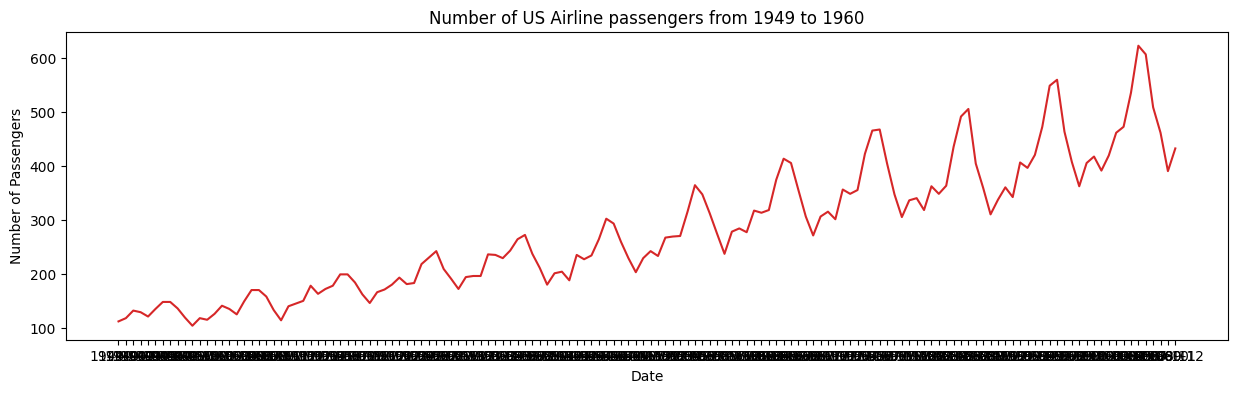

In [ ]:
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Number of Passengers', dpi=100):
    plt.figure(figsize=(15,4), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()


plot_df(df, x=df['Date'], y=df['Number of Passengers'], title='Number of US Airline passengers from 1949 to 1960')

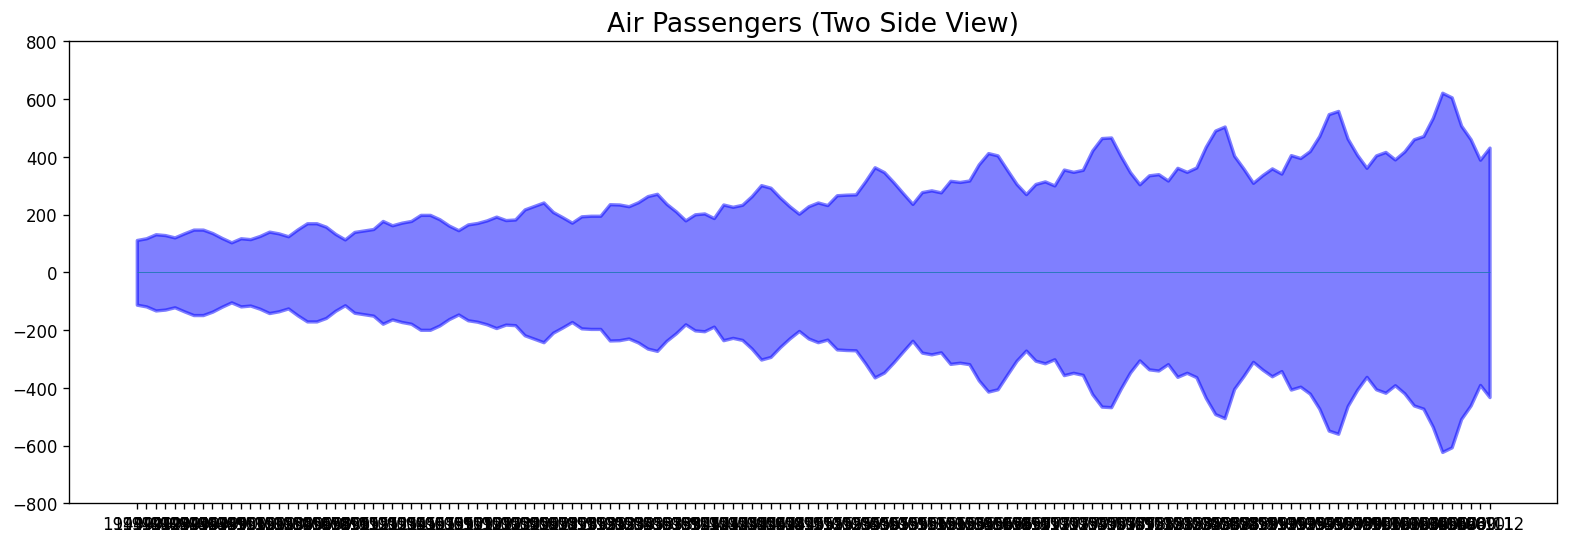

In [ ]:
x = df['Date'].values
y1 = df['Number of Passengers'].values

# Plot
fig, ax = plt.subplots(1, 1, figsize=(16,5), dpi= 120)
plt.fill_between(x, y1=y1, y2=-y1, alpha=0.5, linewidth=2, color='blue')
plt.ylim(-800, 800)
plt.title('Air Passengers (Two Side View)', fontsize=16)
plt.hlines(y=0, xmin=np.min(df['Date']), xmax=np.max(df['Date']), linewidth=.5)
plt.show()

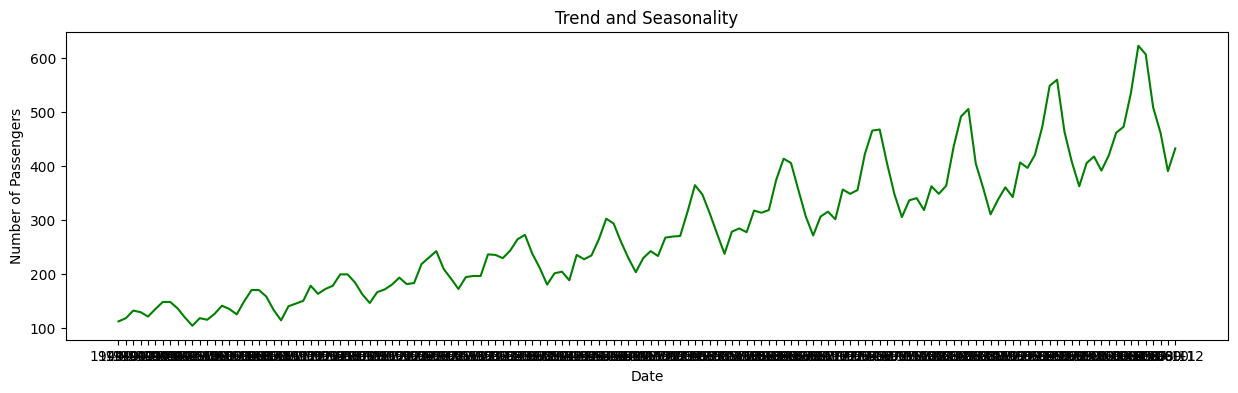

In [ ]:
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Number of Passengers', dpi=100):
    plt.figure(figsize=(15,4), dpi=dpi)
    plt.plot(x, y, color='green')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()


plot_df(df, x=df['Date'], y=df['Number of Passengers'], title='Trend and Seasonality')

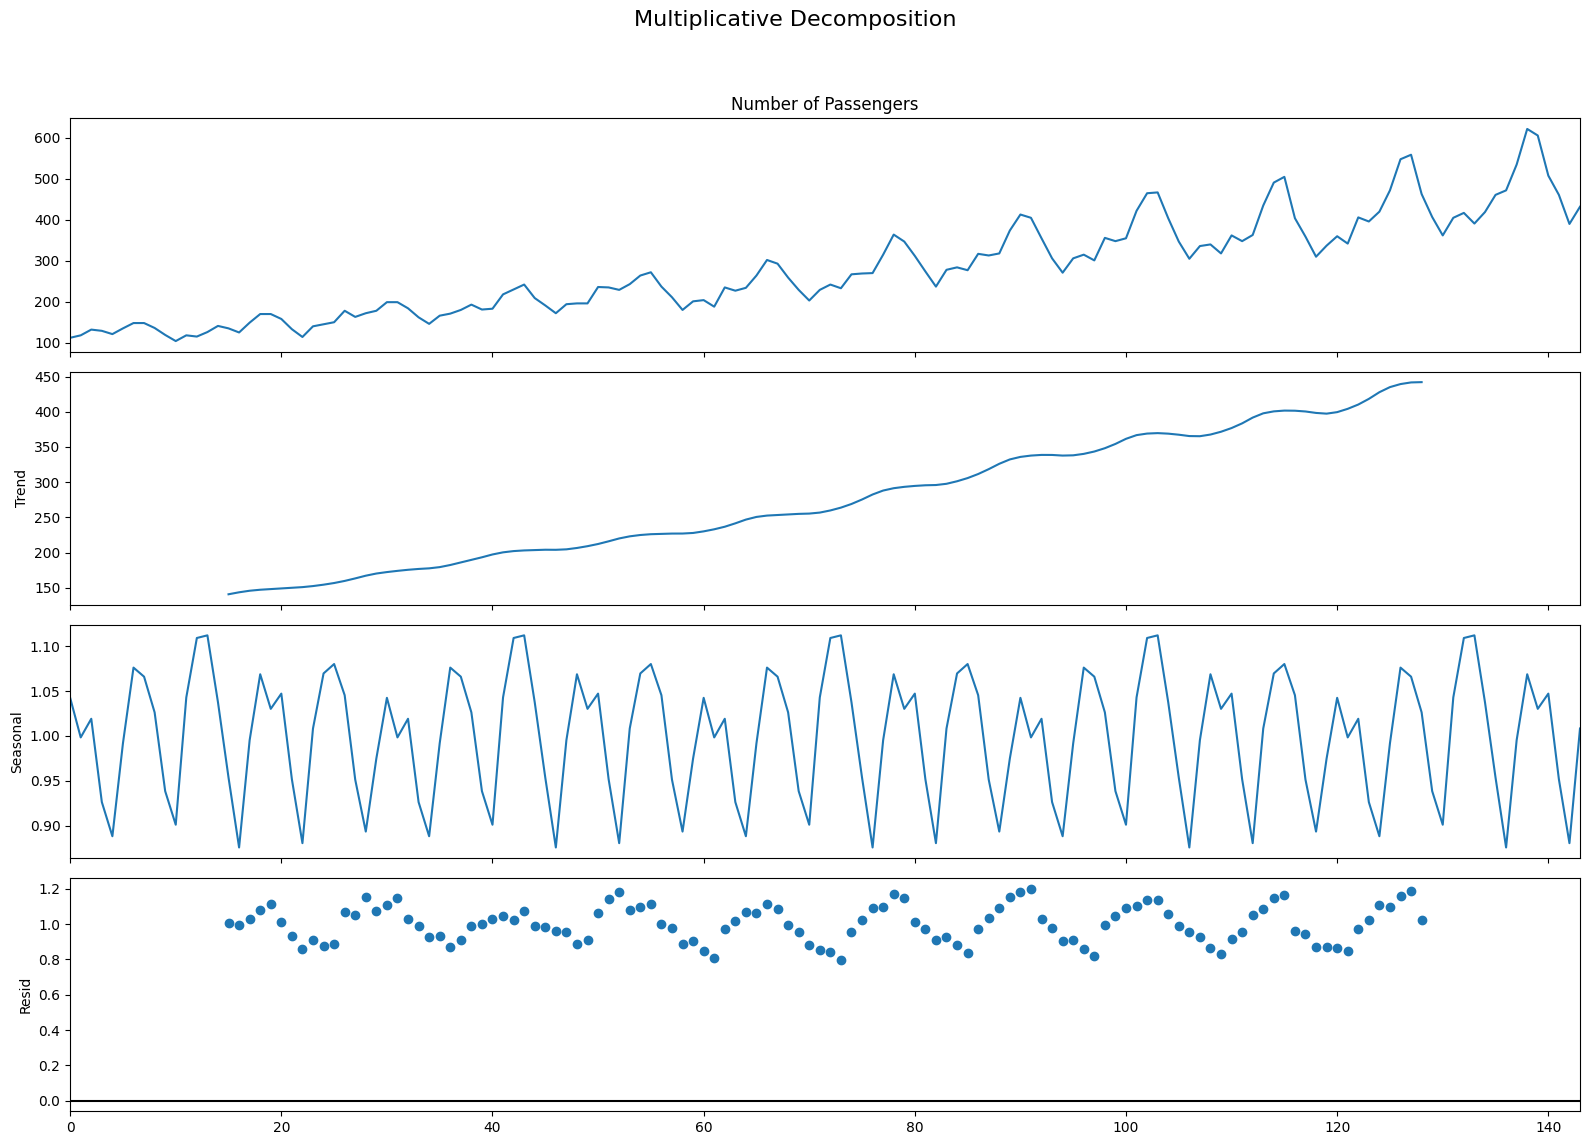

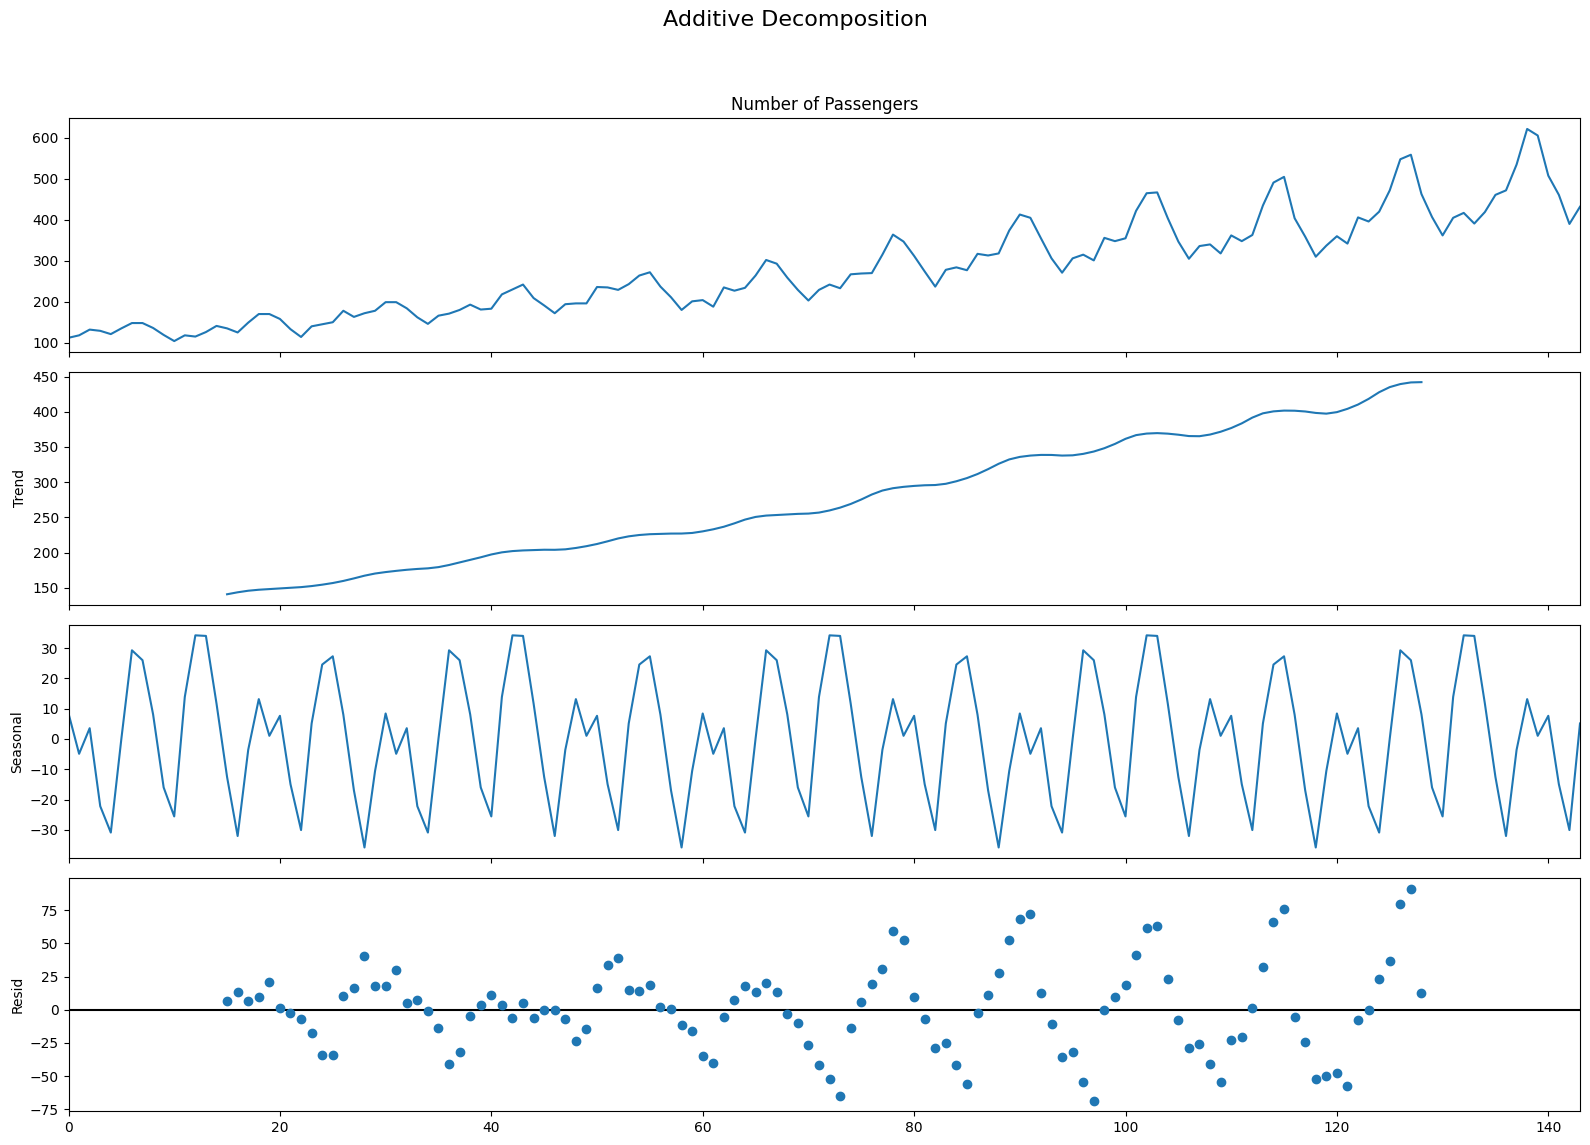

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse


# Multiplicative Decomposition
multiplicative_decomposition = seasonal_decompose(df['Number of Passengers'], model='multiplicative', period=30)

# Additive Decomposition
additive_decomposition = seasonal_decompose(df['Number of Passengers'], model='additive', period=30)

# Plot
plt.rcParams.update({'figure.figsize': (16,12)})
multiplicative_decomposition.plot().suptitle('Multiplicative Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

additive_decomposition.plot().suptitle('Additive Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

In [ ]:
# Convert index to datetime if not already done
df.index = pd.to_datetime(df.index)
print(df)

                                  Date  Number of Passengers
1970-01-01 00:00:00.000000000  1949-01                   112
1970-01-01 00:00:00.000000001  1949-02                   118
1970-01-01 00:00:00.000000002  1949-03                   132
1970-01-01 00:00:00.000000003  1949-04                   129
1970-01-01 00:00:00.000000004  1949-05                   121
...                                ...                   ...
1970-01-01 00:00:00.000000139  1960-08                   606
1970-01-01 00:00:00.000000140  1960-09                   508
1970-01-01 00:00:00.000000141  1960-10                   461
1970-01-01 00:00:00.000000142  1960-11                   390
1970-01-01 00:00:00.000000143  1960-12                   432

[144 rows x 2 columns]


In [ ]:
pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 10.4 MB/s eta 0:00:00


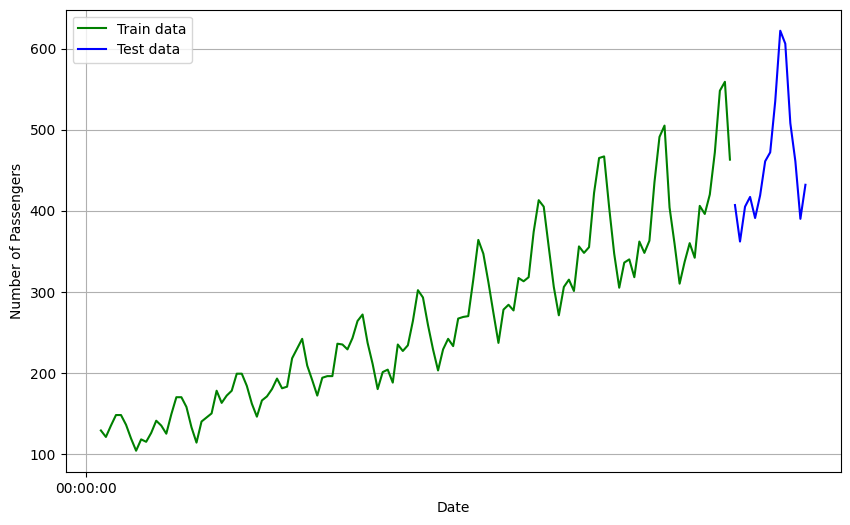

In [ ]:
import matplotlib.pyplot as plt
from pmdarima import auto_arima

# # Convert index to datetime if not already done
# df.index = pd.to_datetime(df.index)

# Split data into train and test sets
train_data = df[3:int(len(df)*0.9)]  # Training data from index 3 to 90% of the length
test_data = df[int(len(df)*0.9):]  # Testing data from 90% of the length to the end

# Plotting (optional)
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.plot(train_data.index, train_data['Number of Passengers'], 'green', label='Train data')
plt.plot(test_data.index, test_data['Number of Passengers'], 'blue', label='Test data')
plt.legend()
plt.show()

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2057.847, Time=0.09 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.23 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1412.973, Time=0.18 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=1410.569, Time=0.42 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=1417.450, Time=0.27 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=1411.319, Time=0.81 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=1411.135, Time=0.69 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=1413.093, Time=0.74 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=inf, Time=0.75 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=inf, Time=1.81 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1408.249, Time=0.80 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1409.748, Time=0.41 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1413.639, Time=0.41 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=1408.287, T

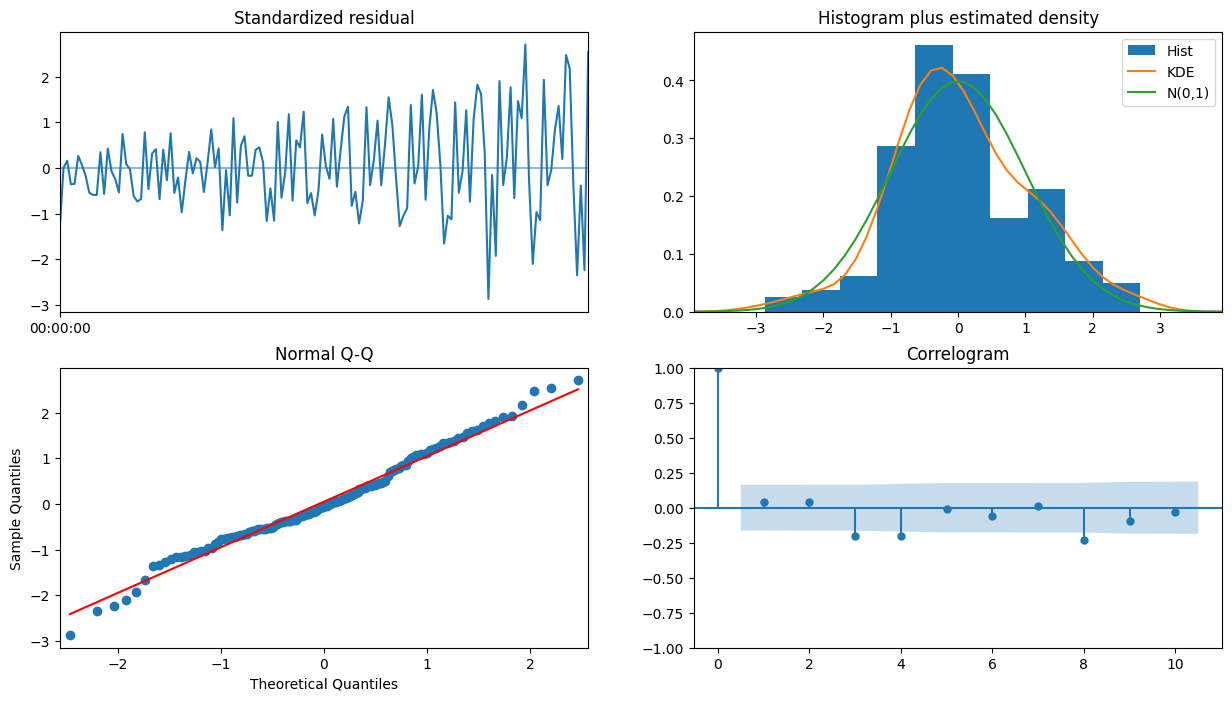

In [ ]:
# Fit auto ARIMA model
model_autoARIMA = auto_arima(df['Number of Passengers'], start_p=0, start_q=0,
                             test='adf',  # use adftest to find optimal 'd'
                             max_p=3, max_q=3,  # maximum p and q
                             m=1,  # frequency of series
                             d=None,  # let model determine 'd'
                             seasonal=False,  # No Seasonality
                             start_P=0,
                             D=0,
                             trace=True,
                             error_action='ignore',
                             suppress_warnings=True,
                             stepwise=True)

# Print summary
print(model_autoARIMA.summary())

# Plot diagnostics (optional)
model_autoARIMA.plot_diagnostics(figsize=(15, 8))
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency N will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency N will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency N will be used.
  self._init_dates(dates, freq)
<ipython-input-20-f364cd69fbd2>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data["predicted_passengers"] = forecast


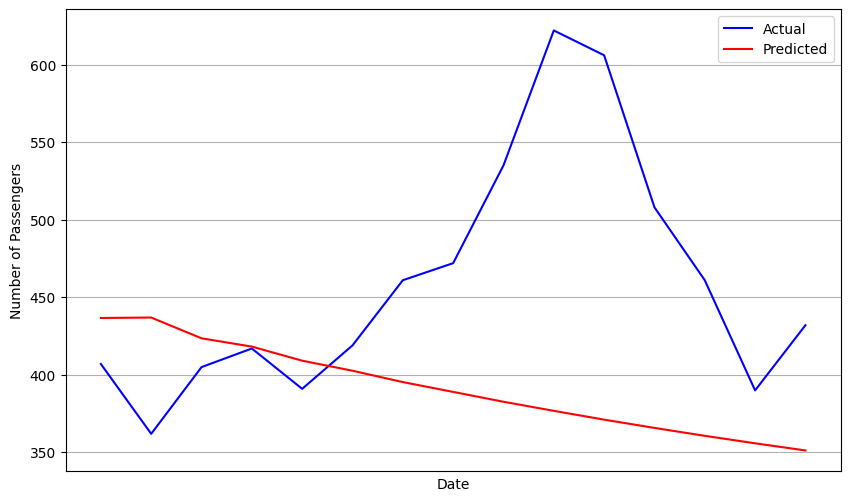

In [ ]:
# Assuming the columns are named "Date" and "No. of Passengers"
date = pd.to_datetime(train_data["Date"])
passengers = train_data["Number of Passengers"]

# Fit ARIMA model with identified parameters (replace with your identified p, d, and q)
model = ARIMA(passengers, order=(2, 0, 1))
model_fit = model.fit()

# Generate forecasts for the same dates as the test data
forecast = model_fit.forecast(steps=len(test_data))

# Create a new column in the test data for predicted values
test_data["predicted_passengers"] = forecast

# Plot actual and predicted values for the test data
plt.figure(figsize=(10, 6))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.plot(test_data.index, test_data['Number of Passengers'], 'blue', label='Actual')
plt.plot(test_data.index, test_data['predicted_passengers'], 'red', label='Predicted')
plt.legend()
plt.show()

In [ ]:
forecast = model_fit.forecast(steps=20)

print("Predicted number of passengers for the next 20 months:")
print(forecast)


Predicted number of passengers for the next 20 months:
1970-01-01 00:00:00.000000129    436.670947
1970-01-01 00:00:00.000000130    436.959713
1970-01-01 00:00:00.000000131    423.565319
1970-01-01 00:00:00.000000132    418.212441
1970-01-01 00:00:00.000000133    409.139541
1970-01-01 00:00:00.000000134    402.666013
1970-01-01 00:00:00.000000135    395.350803
1970-01-01 00:00:00.000000136    389.024002
1970-01-01 00:00:00.000000137    382.671161
1970-01-01 00:00:00.000000138    376.814912
1970-01-01 00:00:00.000000139    371.149248
1970-01-01 00:00:00.000000140    365.816725
1970-01-01 00:00:00.000000141    360.718839
1970-01-01 00:00:00.000000142    355.888299
1970-01-01 00:00:00.000000143    351.287980
1970-01-01 00:00:00.000000144    346.919426
1970-01-01 00:00:00.000000145    342.764214
1970-01-01 00:00:00.000000146    338.815572
1970-01-01 00:00:00.000000147    335.061264
1970-01-01 00:00:00.000000148    331.492787
Freq: N, Name: predicted_mean, dtype: float64
